#### Este projeto tem como foco a análise e tratamento de dados, sendo duplicatas, missing dada, com algumas análises gerais quantitativa da base de dados de canais do Youtube
## Visão Geral Dados

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
dados = pd.read_csv('dados/ASMR_channels.csv')
dados.head(5)

,channelId,customUrl,title,description,country,viewCount,subscriberCount,videoCount,madeForkids,creationDate
0,UCFmL725KKPx2URVPvH3Gp8w,@asmrglow,ASMR Glow,Here's everywhere you can find me: https://lin...,US,579354212,1720000,736,False,2016-10-24T08:22:54Z
1,UCvp9ypbbOQ2-vtuO-J3k-lw,@alexandriaasmr8317,Alexandria ASMR,ASMR - Autonomous sensory meridian response. I...,US,108539091,548000,295,False,2018-10-16T19:45:42Z
2,UCrZyUPCnPgPDFNzawuI2QVA,@asmrjas,ASMR Jas,"Hey, my name is Jas :)\nI stumbled across ASMR...",CA,28304876,313000,60,False,2020-05-03T02:20:06.799314Z
3,UCNkX5VXtTe4Clkogm6h6QWA,@gingerasmr,Ginger ASMR,Hello there! My name's Megan and welcome to my...,US,56191711,241000,233,False,2019-01-12T22:57:14Z
4,UCikebqFWoT3QC9axUbXCPYw,@theasmrdarling,ASMR Darling,Hello and welcome to my ASMR Youtube channel! ...,US,615078281,2520000,269,False,2014-12-11T04:12:54Z


In [3]:
# verificando o tipo de dados de cada váriavel (coluna)
data_type = pd.DataFrame(dados.dtypes, columns = ['Tipo de Dados'])
data_type.columns.name = 'Variáveis'
data_type

Variáveis,Tipo de Dados
channelId,object
customUrl,object
title,object
description,object
country,object
viewCount,int64
subscriberCount,int64
videoCount,int64
madeForkids,object
creationDate,object


In [4]:
# detalhando dos dados faltantes e tipos de dados 
dados.info()
print ('A base de dados apresenta {} registros'.format(dados.shape[0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   channelId        1819 non-null   object
 1   customUrl        1815 non-null   object
 2   title            1819 non-null   object
 3   description      1386 non-null   object
 4   country          998 non-null    object
 5   viewCount        1819 non-null   int64 
 6   subscriberCount  1819 non-null   int64 
 7   videoCount       1819 non-null   int64 
 8   madeForkids      847 non-null    object
 9   creationDate     1819 non-null   object
dtypes: int64(3), object(7)
memory usage: 142.2+ KB
A base de dados apresenta 1819 registros


## Tratando Dados Faltantes (missing data)

In [5]:
# Verificando que na váriavel 'country' possui maior volume de dados faltantes
A = dados['country'].shape[0]
B = dados[dados['country'].isnull()].shape[0]
C = dados[dados['country'].notnull()].shape[0]
print('A base de dados possui um total de {} registros, sendo não nulos {} e nulos {}.'.format(A,C,B))


A base de dados possui um total de 1819 registros, sendo não nulos 998 e nulos 821.


In [6]:
# Verificando que na váriavel 'customUrl' possui maior volume de dados faltantes
A = dados['customUrl'].shape[0]
B = dados[dados['customUrl'].isnull()].shape[0]
C = dados[dados['customUrl'].notnull()].shape[0]
print('A base de dados possui um total de {} registros, sendo não nulos {} e nulos {}.'.format(A,C,B))


A base de dados possui um total de 1819 registros, sendo não nulos 1815 e nulos 4.


In [7]:
# Verificando que na váriavel 'madeForkids' possui maior volume de dados faltantes
A = dados['madeForkids'].shape[0]
B = dados[dados['madeForkids'].isnull()].shape[0]
C = dados[dados['madeForkids'].notnull()].shape[0]
print('A base de dados possui um total de {} registros, sendo não nulos {} e nulos {}.'.format(A,C,B))


A base de dados possui um total de 1819 registros, sendo não nulos 847 e nulos 972.


In [8]:
# Verificando que na váriavel 'description' possui maior volume de dados faltantes
A = dados['description'].shape[0]
B = dados[dados['description'].isnull()].shape[0]
C = dados[dados['description'].notnull()].shape[0]
print('A base de dados possui um total de {} registros, sendo não nulos {} e nulos {}.'.format(A,C,B))


A base de dados possui um total de 1819 registros, sendo não nulos 1386 e nulos 433.


In [9]:
# tratando dados missing para inserir 'unknown' em dados faltantes eliminar os dados nulos 
cols_to_replace = ['country','customUrl','madeForkids','description']
values_to_replace = 'unknown'

for col in cols_to_replace:
    dados[col] = dados[col].fillna(values_to_replace)


In [10]:
# Verificando resultados da inserção de 'unknown' em dados nulos
dados.isna().sum()

channelId          0
customUrl          0
title              0
description        0
country            0
viewCount          0
subscriberCount    0
videoCount         0
madeForkids        0
creationDate       0
dtype: int64

## Tratando Duplicatas

In [11]:
# verificando dados duplicados
data_duplicate = dados.duplicated().sum()
print("A base de dados possui um total de {} dados duplicados.".format(data_duplicate))

A base de dados possui um total de 11 dados duplicados.


In [12]:
# removendo dados duplicados
dados = dados.drop_duplicates()
dados.shape[0]

1808

In [13]:
sorted(dados['title'].unique())

[' ASMR Milana gloves & boots ',
 ' Magic Мantras ASMR Relaxing',
 ' Mxrcedxs ASMR',
 ' Reach for the stars ASMR ',
 ' Relaxing Soundsland ASMR',
 '(ASMR°°°SMART)',
 '-Kanade ASMR- かなでASMR',
 '/anime ASMR',
 '4K Ocean Waves ASMR',
 '89 ASMR',
 '909aj3 ASMR',
 'A ASMR',
 'A Journey in Light ASMR & Relaxation',
 'A Minor ASMR',
 'A Random Guy ASMR',
 'A little bit of ASMR',
 'AAP ASMR',
 'ADSR ASMR',
 'AK  ASMR ',
 'ALB in whisperland ASMR',
 'ALINA ASMR',
 'ALUNA ASMR',
 'AMIR ASMR',
 'AN ASMR',
 'ANGELY WHISPER ASMR  Y BLOGS',
 'AOKI asmr',
 'ARAB DIY ASMR',
 'ARISA ASMR',
 'ASF ASMR',
 'ASMR',
 'ASMR ',
 'ASMR  Barbers',
 'ASMR  Sleep',
 'ASMR #ASMR YT',
 'ASMR & R',
 'ASMR - Nevskaya',
 'ASMR - Win',
 'ASMR 777',
 'ASMR 777 CUTTING',
 'ASMR ALICE',
 'ASMR AURA Massage Therapy',
 'ASMR AYA',
 'ASMR Activated',
 'ASMR Airy',
 'ASMR Alice',
 'ASMR Alise',
 'ASMR Alysaa',
 'ASMR Amy DE',
 'ASMR Amy Vlog',
 'ASMR Angel',
 'ASMR Angelic',
 'ASMR Angel💜',
 'ASMR Anil Çakmak',
 'ASMR Anna',


### 10 Países que mais possuem canais criados no YOUTUBE

#### Podemos perceber que possuímos na base de dados muitas canais criado sem a classificação do país o que de fato pode interferir nos cálculos

In [61]:
# informar dados dos 10 paises que possuem mais canais criados de ASMR
selecao = dados[['country','title']].groupby(['country']).count().sort_values('title', ascending=False).head(10)

,title
country,
unknown,820
US,229
JP,93
GB,81
IT,75
KR,65
DE,52
FR,48
RU,41


In [14]:
# realizando agrupamento de dados por país
dados[['country','title']].groupby(['country']).count()

,title
country,
AR,4
AT,5
AU,21
AZ,1
BD,2
...,...
TW,4
UA,14
US,229


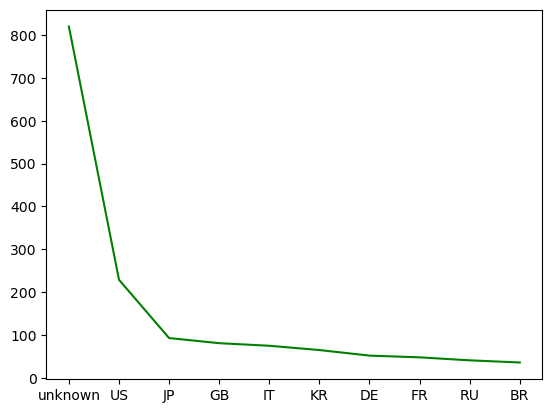

In [69]:
# inserindo grafico
# maior quantidade de paises com canais no YT
plt.plot(selecao,'g')

In [77]:
# canais com mais subscritos e seus paises 10

selecao = dados[['country','title','subscriberCount']].groupby(['country']).sum().sort_values('subscriberCount', ascending=False).head(10)
selecao



,subscriberCount
country,
US,119323599
KR,59106645
unknown,28737790
CA,16921586
JP,15246537
GB,11821332
IT,9121482
FR,7929764
DE,6884551


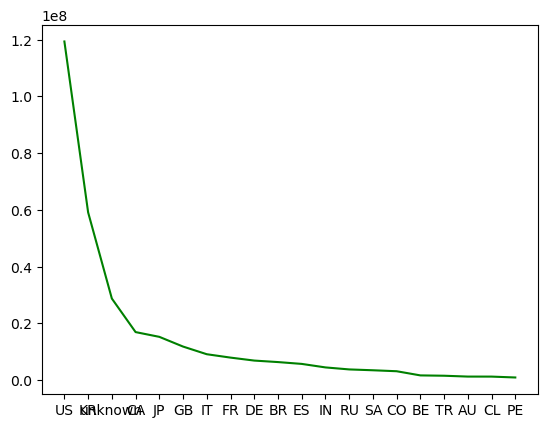

In [76]:
# inserindo gráfico
plt.plot(selecao,'g')      

In [ ]:
# podemos verificar que o canal que possui mais subscritos é o 'Zach Choi ASMR	'

In [97]:
# canal com mais subscritos e seu pais os 20 primeiros países
selecao = dados[['country','title','subscriberCount']].groupby(['title','country']).sum().sort_values('subscriberCount', ascending=False).head(20)
selecao

,,subscriberCount
title,country,
Zach Choi ASMR,US,18800000
Jane ASMR 제인,US,17300000
Hongyu ASMR 홍유,KR,14600000
SAS-ASMR,CA,9400000
SIO ASMR,KR,8850000
HunniBee ASMR,US,8410000
Kim&Liz ASMR,US,6490000
ASMR Lilibu,US,5080000
Gibi ASMR,US,4580000


In [ ]:
# realizando analise por datas 

In [16]:
dados_mes = dados.creationDate.str[5:7]
dados_ano = dados.creationDate.str[:4]
dados_data = pd.to_datetime(dados.creationDate.str[:10])

In [17]:
dados['Mes'] = dados_mes
dados['Ano'] = dados_ano
dados['Data'] = dados_data

In [116]:
# temos a quantidade de canais criados nos últimos 10 anos
selecao = dados[['Ano','title']].groupby(['Ano']).count().sort_values('title', ascending=False).head(10)
selecao

,title
Ano,
2022,380
2021,354
2020,317
2019,179
2018,155
2017,119
2016,86
2015,62
2013,47


In [149]:
# percentual de crescimento do ano passado de 2022 foi (21,01%)
Ano_2022 = (380 / 1808)
Ano_2022

0.21017699115044247